<a href="https://colab.research.google.com/github/JSOrtegaB/pruebas/blob/main/Reto/Reto_Entrega_2_Clasificaci%C3%B3n_ensambles_y_presentacion_ejecutiva_JuanSebastianOrtegaBriones_A01794327.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

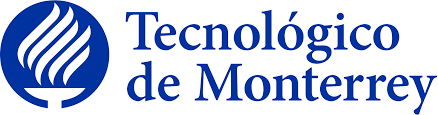

# Reto: Parte 2 Clasificación-ensambles y presentación ejecutiva
## Ciencia y analítica de datos
### Profesor: María de la Paz Rico Fernández
### Juan Sebastián Ortega Briones A01794327
### Equipo 13
**18 de Noviembre del 2022**

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as color
import seaborn as sns
%matplotlib inline

In [28]:
pd.set_option("display.max_columns", 57)
pd.set_option("display.max_rows", 100)

**Uso de Base de datos de Aguas Subterraneas**

In [29]:
df=pd.read_csv("https://raw.githubusercontent.com/PosgradoMNA/actividades-del-projecto-equipo-13/main/Reto/Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_subterraneas_2020.csv", encoding = 'ISO-8859-1')  #Importa datos de Aguas subterraneas

In [30]:
df.head()

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,ALC_mg/L,CALIDAD_ALC,CONDUCT_mS/cm,CALIDAD_CONDUC,SDT_mg/L,SDT_M_mg/L,CALIDAD_SDT_ra,CALIDAD_SDT_salin,FLUORUROS_mg/L,CALIDAD_FLUO,DUR_mg/L,CALIDAD_DUR,COLI_FEC_NMP/100_mL,CALIDAD_COLI_FEC,N_NO3_mg/L,CALIDAD_N_NO3,AS_TOT_mg/L,CALIDAD_AS,CD_TOT_mg/L,CALIDAD_CD,CR_TOT_mg/L,CALIDAD_CR,HG_TOT_mg/L,CALIDAD_HG,PB_TOT_mg/L,CALIDAD_PB,MN_TOT_mg/L,CALIDAD_MN,FE_TOT_mg/L,CALIDAD_FE,SEMAFORO,CONTAMINANTES,CUMPLE_CON_ALC,CUMPLE_CON_COND,CUMPLE_CON_SDT_ra,CUMPLE_CON_SDT_salin,CUMPLE_CON_FLUO,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,2020,229.990,Alta,940.0,Permisible para riego,NaN,603.6,Cultivos sensibles,Potable - Dulce,0.9766,Potable - Optima,213.732,Potable - Dura,<1.1,Potable - Excelente,4.184656,Potable - Excelente,0.0161,Apta como FAAP,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,0.0891,Potable - Excelente,Verde,NaN,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
1,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,2020,231.990,Alta,608.0,Buena para riego,NaN,445.4,Excelente para riego,Potable - Dulce,0.9298,Potable - Optima,185.0514,Potable - Dura,<1.1,Potable - Excelente,5.75011,Potable - Buena calidad,0.0134,Apta como FAAP,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,<0.025,Potable - Excelente,Verde,NaN,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,2020,204.920,Alta,532.0,Buena para riego,NaN,342,Excelente para riego,Potable - Dulce,1.8045,Alta,120.719,Potable - Dura,<1.1,Potable - Excelente,1.449803,Potable - Excelente,0.037,No apta como FAAP,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,<0.025,Potable - Excelente,Rojo,"FLUO,AS,",SI,SI,SI,SI,NO,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,2020,327.000,Alta,686.0,Buena para riego,NaN,478.6,Excelente para riego,Potable - Dulce,1.1229,Potable - Optima,199.879,Potable - Dura,<1.1,Potable - Excelente,1.258597,Potable - Excelente,0.0154,Apta como FAAP,<0.003,Potable - Excelente,0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,<0.025,Potable - Excelente,Verde,NaN,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,2020,309.885,Alta,1841.0,Permisible para riego,NaN,1179,Cultivos con manejo especial,Ligeramente salobres,0.2343,Baja,476.9872,Potable - Dura,291,Aceptable,15.672251,No apta como FAAP,<0.01,Potable - Excelente,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,<0.025,Potable - Excelente,Rojo,"NO3,",SI,SI,SI,SI,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI


In [31]:
df.shape

(1068, 57)

# Limpieza de datos

In [32]:
#Array de solo las columnas numericas
datos_numericos=['ALC_mg/L', 'CONDUCT_mS/cm', 'SDT_M_mg/L', 'FLUORUROS_mg/L', 'DUR_mg/L', 'COLI_FEC_NMP/100_mL', 'N_NO3_mg/L', 'AS_TOT_mg/L', 'CD_TOT_mg/L', 'CR_TOT_mg/L', 'HG_TOT_mg/L', 'PB_TOT_mg/L', 'MN_TOT_mg/L', 'FE_TOT_mg/L']

In [33]:
#Remplaza datos numericos que incluyen el simbolo < por 0
df.replace(to_replace=r'[<]\w+', value=0, regex=True, inplace=True)

In [34]:
#La columna SDT_mg/L no contiene datos y la de CONTAMINANTES tiene muchos Nan seran eliminadas
df.drop(['SDT_mg/L','CONTAMINANTES'], axis=1, inplace=True)


In [35]:
df.dropna(inplace=True)

In [36]:
#Convierte columnas que contienen datos númericos de tipo objeto a tipo flotante
df[datos_numericos]=df[datos_numericos].astype('float')

# Clasificación

In [37]:
categorias=df['SEMAFORO'].unique()
categorias

array(['Verde', 'Rojo', 'Amarillo'], dtype=object)

In [38]:
#Cambia la columna del semaforo de un string a un numero para poder comparar con kameans
y=df['SEMAFORO'].apply(lambda x: categorias.tolist().index(x))

In [39]:
X=df[datos_numericos].values
columnas=df[datos_numericos].columns

In [40]:
columnas

Index(['ALC_mg/L', 'CONDUCT_mS/cm', 'SDT_M_mg/L', 'FLUORUROS_mg/L', 'DUR_mg/L',
       'COLI_FEC_NMP/100_mL', 'N_NO3_mg/L', 'AS_TOT_mg/L', 'CD_TOT_mg/L',
       'CR_TOT_mg/L', 'HG_TOT_mg/L', 'PB_TOT_mg/L', 'MN_TOT_mg/L',
       'FE_TOT_mg/L'],
      dtype='object')

In [41]:
from sklearn.tree import DecisionTreeClassifier

In [54]:
tree_clf = DecisionTreeClassifier(max_depth=4, random_state=42)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=4, random_state=42)

**Importancia de las variables**

In [55]:
importancia_clf=pd.DataFrame(tree_clf.feature_importances_,columns=['importancia'])
importancia_clf['nombres']=columnas
importancia_clf.sort_values(by='importancia', ascending=False)

,importancia,nombres
3,0.332748,FLUORUROS_mg/L
4,0.276398,DUR_mg/L
6,0.199842,N_NO3_mg/L
13,0.131057,FE_TOT_mg/L
5,0.038022,COLI_FEC_NMP/100_mL
7,0.021931,AS_TOT_mg/L
0,0.000000,ALC_mg/L
1,0.000000,CONDUCT_mS/cm
2,0.000000,SDT_M_mg/L
8,0.000000,CD_TOT_mg/L


In [56]:
from sklearn.tree import export_graphviz

export_graphviz(
        tree_clf,
        out_file=str( "aguas_subterraneas.dot"),  # path differs in the book
        feature_names=columnas,
        class_names=categorias,
        rounded=True,
        filled=True
    )

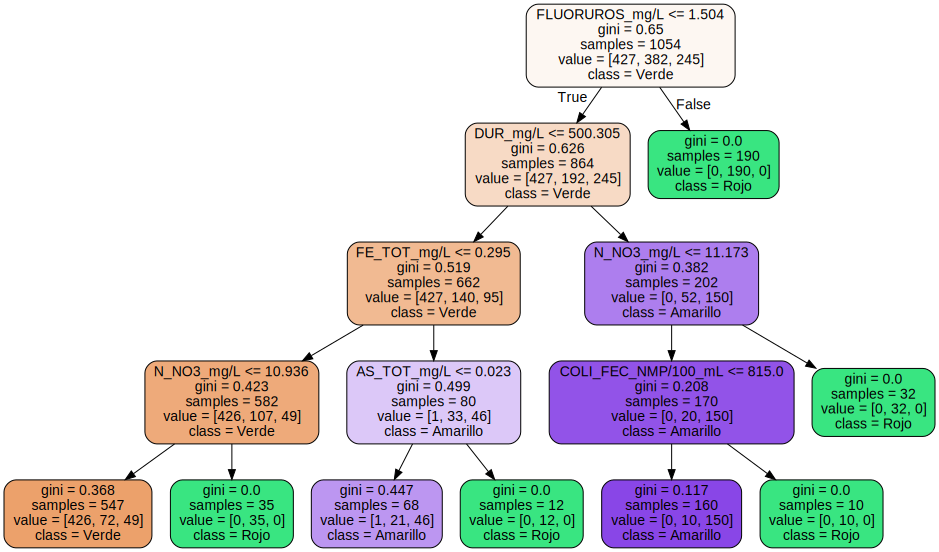

In [57]:
from graphviz import Source

Source.from_file("aguas_subterraneas.dot")  # path differs in the book

In [58]:
!dot -Tpng {"aguas_subterraneas.dot"} -o {"aguas_subterraneas.png"}

In [47]:
from sklearn.tree import DecisionTreeRegressor

In [65]:
tree_reg = DecisionTreeRegressor(max_depth=4, random_state=42)
tree_reg.fit(X, y)

DecisionTreeRegressor(max_depth=4, random_state=42)

In [66]:
importancia=pd.DataFrame(tree_reg.feature_importances_,columns=['importancia'])
importancia['nombres']=columnas
importancia.sort_values(by='importancia', ascending=False)

,importancia,nombres
4,0.434251,DUR_mg/L
12,0.191849,MN_TOT_mg/L
3,0.175533,FLUORUROS_mg/L
13,0.121840,FE_TOT_mg/L
6,0.043786,N_NO3_mg/L
5,0.025294,COLI_FEC_NMP/100_mL
7,0.007447,AS_TOT_mg/L
0,0.000000,ALC_mg/L
1,0.000000,CONDUCT_mS/cm
2,0.000000,SDT_M_mg/L


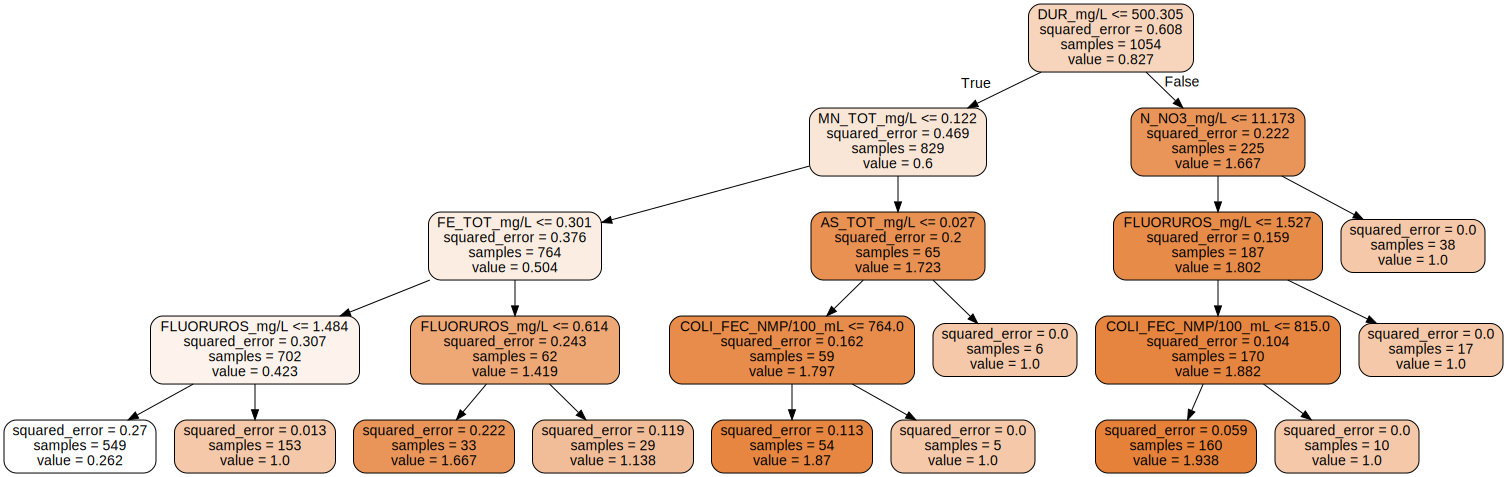

In [67]:
export_graphviz(
    tree_reg,
    out_file=str("regression_tree.dot"),
    feature_names=columnas,
    rounded=True,
    filled=True
)

Source.from_file("regression_tree.dot")



In [51]:
!dot -Tpng {"regression_tree.dot"} -o {"regression_tree.png"}